# 데이터 불러오기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 지수 표기법 변경
np.set_printoptions(precision=6, suppress=True)
pd.options.display.float_format = '{:.3f}'.format

In [3]:
# data load
path = '/Users/luci031/Desktop/Coding/chai/data'
df = pd.read_csv(path+'/chai_proceed.csv')

In [4]:
# 시계열 처리

df['created_at'] = pd.to_datetime(df['created_at'])
df['birthday'] = pd.to_datetime(df['birthday'])
df['sign_up_date'] = pd.to_datetime(df['sign_up_date'])

In [5]:
# customer_id, merchant_id string으로 변경

df['customer_id'] = df['customer_id'].astype('string')
df['merchant_id'] = df['merchant_id'].astype('string')

In [6]:
# unnamed 삭제
df = df.iloc[::,1:]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5623810 entries, 0 to 5623809
Data columns (total 13 columns):
 #   Column           Dtype         
---  ------           -----         
 0   customer_id      string        
 1   created_at       datetime64[ns]
 2   pre_discount     int64         
 3   post_discount    int64         
 4   cashback_amount  int64         
 5   discount_amount  int64         
 6   total_promotion  int64         
 7   push_permission  bool          
 8   gender           int64         
 9   is_foreigner     bool          
 10  birthday         datetime64[ns]
 11  sign_up_date     datetime64[ns]
 12  merchant_id      string        
dtypes: bool(2), datetime64[ns](3), int64(6), string(2)
memory usage: 482.7 MB


# 데이터 탐색

## 전반적인 데이터 분포

In [8]:
df.head()

,customer_id,created_at,pre_discount,post_discount,cashback_amount,discount_amount,total_promotion,push_permission,gender,is_foreigner,birthday,sign_up_date,merchant_id
0,207317,2020-03-22 10:27:52.498,36236,36236,1087,0,1087,True,1,False,1957-11-05,2019-11-30 16:48:19.339,9
1,95246,2020-03-12 09:41:09.845,12900,12900,387,0,387,True,1,False,1983-10-23,2019-07-09 08:21:14.098,6
2,208074,2020-02-01 08:54:53.246,7500,7500,225,0,225,True,1,False,1975-07-06,2019-08-15 01:02:13.336,9
3,15552,2020-03-06 10:23:21.183,11800,11800,354,0,354,False,0,False,1996-08-21,2019-08-06 02:09:28.712,4
4,511595,2020-03-13 12:00:27.914,29700,29700,891,0,891,True,1,False,1999-01-23,2020-03-12 00:33:46.147,5


In [9]:
# 데이터 분포
df.describe()

,pre_discount,post_discount,cashback_amount,discount_amount,total_promotion,gender
count,5623810.000,5623810.000,5623810.000,5623810.000,5623810.000,5623810.000
mean,20455.330,19033.951,122.669,1421.380,1544.048,0.724
std,48731.631,47552.056,593.514,1960.640,1979.354,0.447
min,1.000,0.000,0.000,0.000,0.000,0.000
25%,7900.000,6900.000,0.000,0.000,542.000,0.000
50%,11900.000,10900.000,0.000,1000.000,1000.000,1.000
75%,19800.000,17920.000,0.000,2000.000,2000.000,1.000
max,1996000.000,1996000.000,97473.000,500000.000,500000.000,1.000


**Analysis**
- pre_discount와 post_discount의 평균값 및  discount_amount를 확인해봤을 때 평균적으로 1420원 정도 할인이 들어감을 알 수 있다
- 1회에 최대 결제 금액은 1996000원, 약 200만원 가량
- 평균 캐시백 금액은 122.6원, 최대 캐시백 금액은 97473원, 그러나 3사분면까지 캐시백 금액이 0원인 것으로 보아 캐시백이 많이 이뤄지고 있지는 않다
- 평균 할인 금액은 1421.4원, 최대 할인 금액은 500000원, 2사분면 지점의 값이 1000원인 것으로 보아 할인 제도가 캐시백보다 활성화되었음을 알 수 있고, 금액 또한 더 크다
- 둘을 합친 total_promotion의 경우 평균 할인 금액은 1421.3원 가량 -> 캐시백과 일반 할인이 동시에 이뤄지는 지 확인 필요
- Gender의 경우 1이 남성, 0이 여성이므로 1에 가까울수록 남성이 많고, 반대의 경우는 여성이 많은 것으로 해석 가능
- Gender의 평균값은 0.724 -> 남성 유저가 여성 유저보다 결제 건수가 많다는 것을 알 수 있다

In [10]:
# 데이터 간 상관관계
df.corr()

,pre_discount,post_discount,cashback_amount,discount_amount,total_promotion,push_permission,gender,is_foreigner
pre_discount,1.000,0.999,0.232,0.614,0.678,-0.019,-0.050,-0.002
post_discount,0.999,1.000,0.243,0.588,0.656,-0.017,-0.048,-0.001
cashback_amount,0.232,0.243,1.000,-0.120,0.181,0.009,-0.012,0.009
discount_amount,0.614,0.588,-0.120,1.000,0.955,-0.048,-0.075,-0.019
total_promotion,0.678,0.656,0.181,0.955,1.000,-0.045,-0.078,-0.016
push_permission,-0.019,-0.017,0.009,-0.048,-0.045,1.000,0.060,0.066
gender,-0.050,-0.048,-0.012,-0.075,-0.078,0.060,1.000,0.031
is_foreigner,-0.002,-0.001,0.009,-0.019,-0.016,0.066,0.031,1.000


**Analysis**
- pre_discount, post_discount, cashback_amount, discount_amount, total_promotion은 서로 수치를 이용하여 생성된 값이므로 당연히 상관관계가 있음
- push_permission, gender, is_foreigner 등은 단순한 집계 방식으로는 상관관계 분석이 어려움 -> 가설을 세우고 검정하는 단계 필요

array([[<AxesSubplot:title={'center':'created_at'}>,
        <AxesSubplot:title={'center':'pre_discount'}>,
        <AxesSubplot:title={'center':'post_discount'}>],
       [<AxesSubplot:title={'center':'cashback_amount'}>,
        <AxesSubplot:title={'center':'discount_amount'}>,
        <AxesSubplot:title={'center':'total_promotion'}>],
       [<AxesSubplot:title={'center':'gender'}>,
        <AxesSubplot:title={'center':'birthday'}>,
        <AxesSubplot:title={'center':'sign_up_date'}>]], dtype=object)

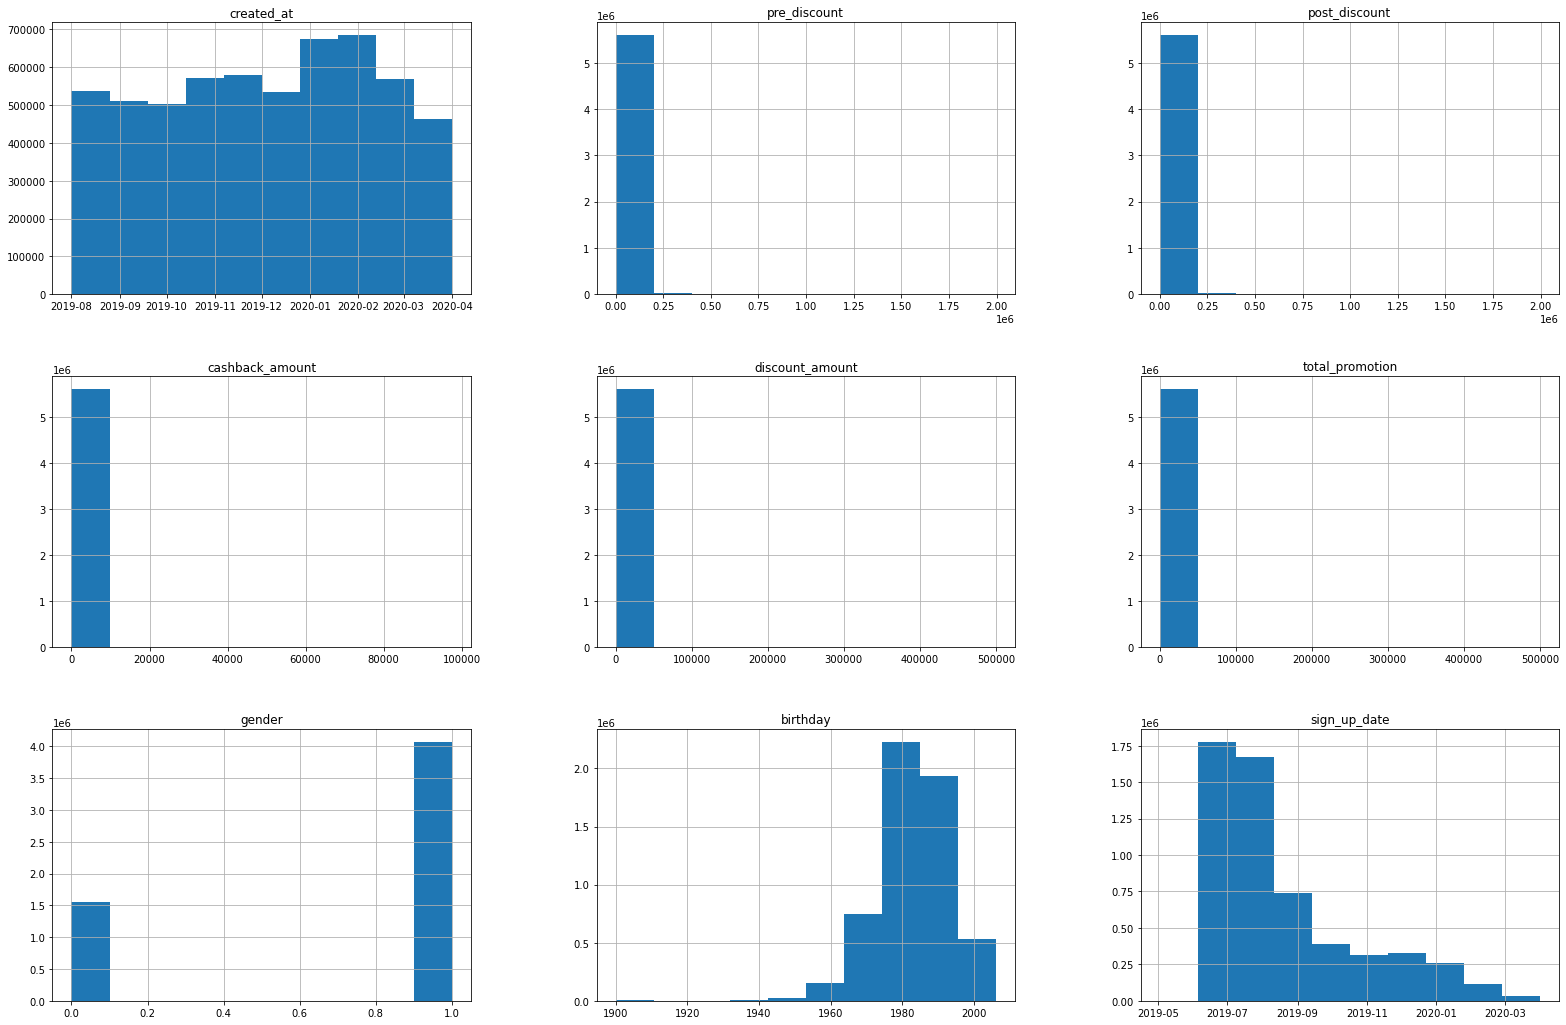

In [11]:
# 전반적인 데이터 분포
df.hist(figsize=(27,18))

### Result
- 각 cloumn 별 분석 진행
- customer_id를 통한 유저 별 구매 건수 및 금액 조사 필요
- 구매일시 (월별, 주별, 일별, 시간대별 등), 가입일자를 이용한 데이터 분석 필요
- merchant_id를 이용한 산업별 소비 정도 탐색 필요
- gender, push_permission, is_foreigner 이용한 AB 테스트 실험
- push_permission + birthday 활용한 생일 쿠폰 전략
- 각 거래 및 평균적인 할인 비율 조사 필요

## Column 별 탐색 및 분석

###

### customer_id

avg : 10.32041341772477


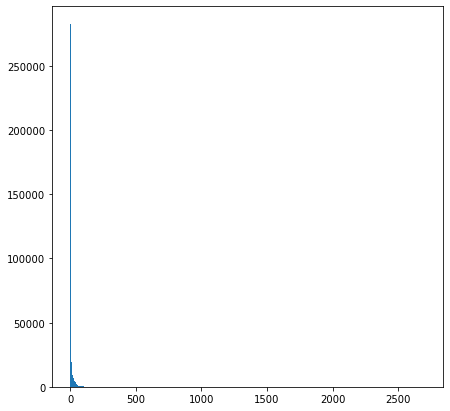

In [68]:
# 총 유저 수 및 유저별 거래량 -> 평균 사용 정도는 10회지만 전반적인 유저 사용 빈도는 적은 편
df_v = df['customer_id'].value_counts()
print(f'avg : {np.mean(df_v.values)}')
plt.figure(figsize=(7,7))
plt.hist(df_v, bins=1000)
plt.show()

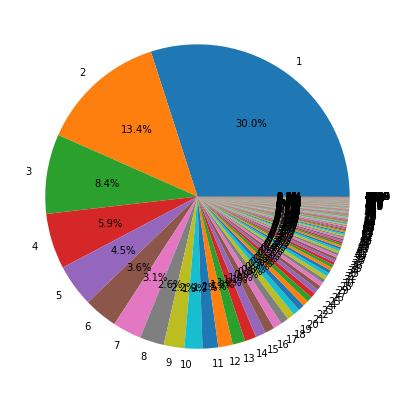

In [70]:
# 점차 유저별 구매 횟수가 감소하는 것을 알 수 있음
a = df['customer_id'].value_counts().to_frame()['customer_id'].value_counts().to_frame().reset_index()
a = a.rename(columns={'index':'pur_count','customer_id':'count'})
plt.figure(figsize=(7,7),facecolor='white')
plt.pie(a['count'], labels=a['pur_count'],autopct='%.1f%%')
plt.show()

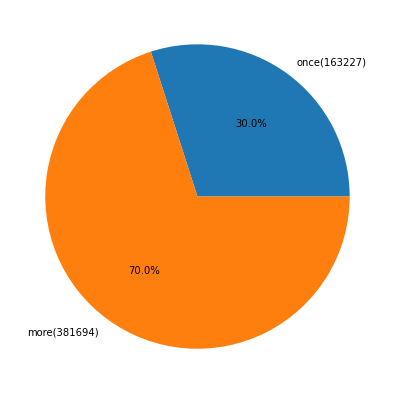

In [13]:
# 30% 가량의 고객은 단 한번만 결제를 함
plt.figure(figsize=(7,7),facecolor="white")
once = df_v[df_v.values==1].count()
more = df_v[df_v.values!=1].count()
labels= ['once'+'('+(str(once))+')','more'+'('+(str(more))+')']
plt.pie([once,more],labels=labels, autopct='%.1f%%')
plt.show()

In [71]:
# 재구매율은 중요한 지표이므로 column에 새로 추가
df['once'] = False
df_v = df_v.to_frame().reset_index()
df_v = df_v.rename(columns={'index':'customer_id','customer_id':'count'})
df = pd.merge(df,df_v,on='customer_id')
df.loc[df['count']==1,'once'] = True
df = df.iloc[::,:-1]
df['once'].value_counts()

False    5460583
True      163227
Name: once, dtype: int64

In [75]:
# 유저별 총 구매 데이터
df_cus1 = df.groupby('customer_id').sum().reset_index()
df_cus1.describe()

,pre_discount,post_discount,cashback_amount,discount_amount,total_promotion,push_permission,gender,is_foreigner,once
count,544921.000,544921.000,544921.000,544921.000,544921.000,544921.000,544921.000,544921.000,544921.000
mean,211107.465,196438.240,1265.993,14669.225,15935.218,5.335,7.469,0.114,0.300
std,550003.100,527836.212,4782.908,26430.607,28799.927,17.769,19.208,4.137,0.458
min,500.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,23800.000,20140.000,0.000,2000.000,3000.000,0.000,0.000,0.000,0.000
50%,67300.000,60480.000,0.000,6000.000,6681.000,0.000,1.000,0.000,0.000
75%,206356.000,191024.000,660.000,15396.000,16663.000,3.000,6.000,0.000,1.000
max,115005350.000,112273800.000,851803.000,2731550.000,2731550.000,2705.000,2705.000,1229.000,1.000


**Analysis**
- 유저들은 평균적으로 기간 동안 21만원 가량을 소비했으며, 약 16000원 정도 프로모션이 적용되어 19.6만원 선에서 구매를 했다
- 유저 별 총 구매 금액의 표준 편차는 55만원 선, 그리고 결제 금액의 75% 지점이 20만원인 것으로 보아 라이트 유저와 헤비 유저 사이의 갭이 꽤 큰 것을 알 수 있다
- 기간 내 결제한 금액이 오직 500원인 유저가 있다
- 어떤 유저는 할인이 적용되어 서비스를 0원에 이용했다
- 위의 분석대로, 전반적으로 캐시백보단 할인 정책이 활성화 되어있다
- 유저들은 기간 동안 인당 16000원 가량의 할인을 받았다
- 평균 총 결제 금액에 따른 할인율은 약 7.5%
- 가장 결제를 많이 한 고객은 기간 동안 1.15억 가량을 결제했다
- 가장 프로모션을 많이 제공받은 고객은 273만원 상당의 프로모션 혜택을 받았다

In [81]:
# 번외: 1억 상당을 구매한 최고의 VIP의 거래 기록, 총 175건을 결제했다
df_cus1[df_cus1['pre_discount'] == max(df_cus1['pre_discount'])]

,customer_id,pre_discount,post_discount,cashback_amount,discount_amount,total_promotion,push_permission,gender,is_foreigner,once
308203,377381,115005350,112273800,0,2731550,2731550,175,0,0,0


In [76]:
# 유저별 평균 구매 데이터
df_cus2 = df.groupby('customer_id').mean().reset_index()
df_cus2.describe()

,pre_discount,post_discount,cashback_amount,discount_amount,total_promotion,push_permission,gender,is_foreigner,once
count,544921.000,544921.000,544921.000,544921.000,544921.000,544921.000,544921.000,544921.000,544921.000
mean,27819.597,25691.276,110.662,2128.321,2238.983,0.419,0.641,0.006,0.300
std,58558.517,57282.716,657.241,2184.221,2219.018,0.493,0.480,0.076,0.458
min,500.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,11472.500,9800.000,0.000,1000.176,1179.879,0.000,0.000,0.000,0.000
50%,16140.333,14504.000,0.000,1666.667,1752.756,0.000,1.000,0.000,0.000
75%,25000.000,23000.000,74.889,2333.333,2470.000,1.000,1.000,0.000,1.000
max,1990950.000,1985950.000,94772.000,254000.000,254000.000,1.000,1.000,1.000,1.000


**Analysis**
- 한 유저 당 거래별 평균 거래 금액은 27800원 가량, 평균적으로 2200원 상당의 할인을 받았다
- 유저 별 총 구매 금액의 표준 편차는 5.8만원 선, 역시 평균 거래 금액을 웃도는 격차가 있다
- 평균 거래 금액의 75% 지점이 25000원인 것으로 보아 헤비 유저와 라이트 유저 사이의 갭을 다시한 번 체감할 수 있다
- 평균 결제 금액에 따른 할인율은 약 8% -> 매 거래 때 비슷한 비율로 할인을 받음을 알 수 있다
- 가장 평균 구매 비용이 높은 고객은 평균적으로 200만원 가량을 결제한다